# Tutorial 1: Human dorsolateral prefrontal cortex (10x Visium)
This tutorial demonstrates the analysis of Mouse Olfactory Bulb data from StereoSeq. 

Dataset could be downloaded from [STOmics DB](https://db.cngb.org/stomics/datasets/)

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from cadast import CadaST
from cadast.utils import clustering

In [2]:
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [4,3]
seed = 2025

sc.settings.seed = seed
np.random.seed(seed)

In [ ]:
data_path = "../dataset/MOB_stereo"
input_dir = os.path.join(data_path, "h5ad/S1.h5ad")
adata = sc.read_h5ad(input_dir)
adata

AnnData object with n_obs × n_vars = 19109 × 27106
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

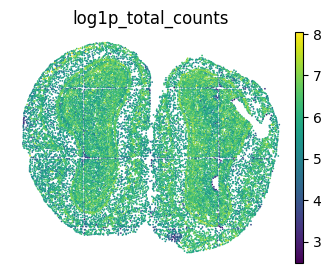

In [4]:
sc.pl.embedding(adata, basis="spatial", color = "log1p_total_counts", frameon=False)

## Preprocess the data

In [5]:
# Preprocess the data 
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

## Run CadaST

In [6]:
n_top = 2000 # n_top SVG 
n_jobs = 16 # parallel jobs 
model = CadaST(
    adata,
    n_top=n_top,
    n_jobs=n_jobs,
    seed = seed #fix the random seed
)
adata_fit = model.fit()
adata_fit 

Constructing KNN
Initializing neighbor correlation matrix 
Initialized model with beta: 10, alpha: 0.6, theta: 0.2
Filtering genes with top 2000 SVG features
Start CadaST model fitting


100%|██████████| 2000/2000 [00:37<00:00, 53.36it/s]


AnnData object with n_obs × n_vars = 19109 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'
    obsm: 'spatial'
    layers: 'labels'

## Clustering using mclust and spatial domain visulization 

In [7]:
clustering(adata=adata_fit, n_clusters=7, seed = seed )

Clustering using mclust


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



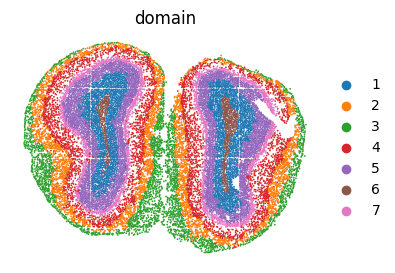

In [8]:
sc.pl.embedding(adata_fit, basis="spatial", color="domain", frameon=False)